****Tesla Stock Price Financial Analysis****


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv('/content/tesla_stock.csv')


In [16]:
data

,Date,Open,High,Low,Close,Adj_Close,Volume
0,"Aug 5, 2025",308.95,312.45,305.50,311.39,311.39,"10,987,193"
1,"Aug 4, 2025",309.08,312.12,303.00,309.26,309.26,"78,529,700"
2,"Aug 1, 2025",306.21,309.31,297.82,302.63,302.63,"89,121,400"
3,"Jul 31, 2025",319.61,321.37,306.10,308.27,308.27,"85,270,900"
4,"Jul 30, 2025",322.18,324.45,311.62,319.04,319.04,"83,931,900"
...,...,...,...,...,...,...,...
1253,"Aug 11, 2020",93.07,94.67,91.00,91.63,91.63,"129,387,000"
1254,"Aug 10, 2020",96.53,97.17,92.39,94.57,94.57,"112,834,500"
1255,"Aug 7, 2020",99.97,99.98,94.33,96.85,96.85,"133,446,000"
1256,"Aug 6, 2020",99.39,101.15,98.48,99.31,99.31,"89,884,500"


In [19]:
data.set_index('Date')
data['Date'] = pd.to_datetime(data['Date'])

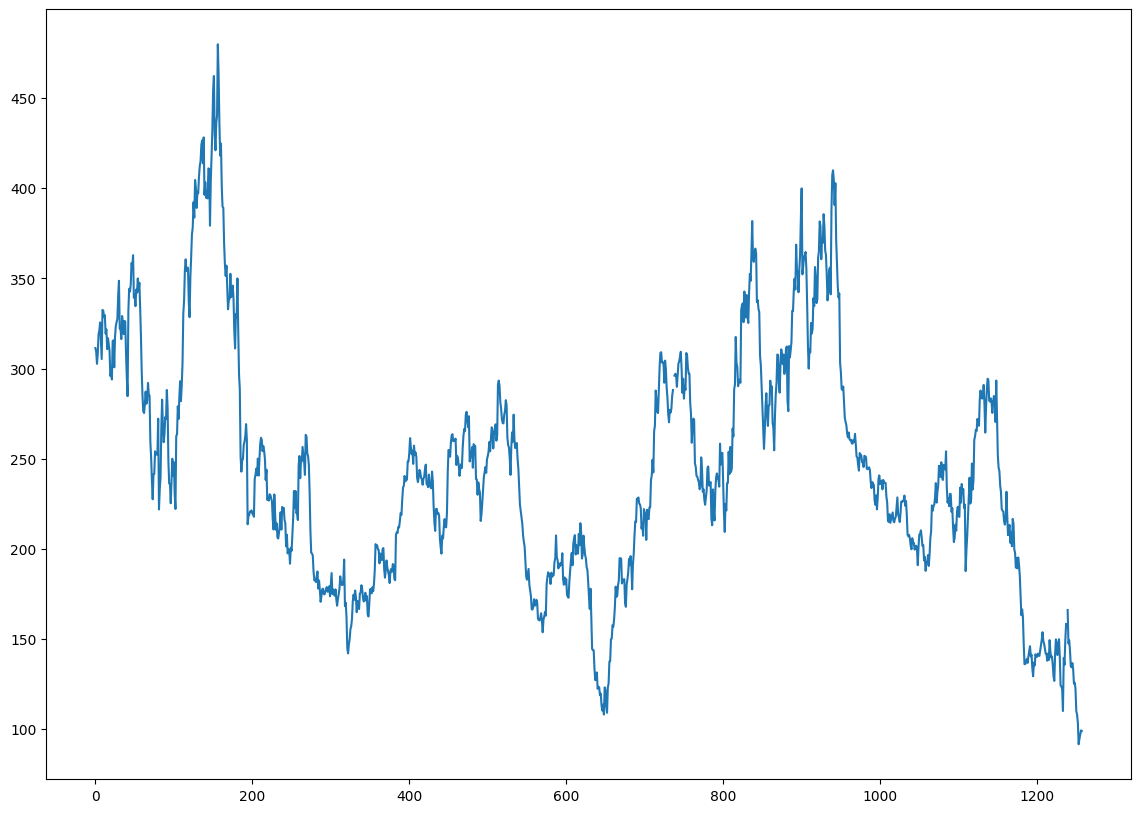

In [22]:
# Plot mock data for line plot
plt.figure(figsize=(14,10))
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')


data[ 'Close'].plot()
plt.show()

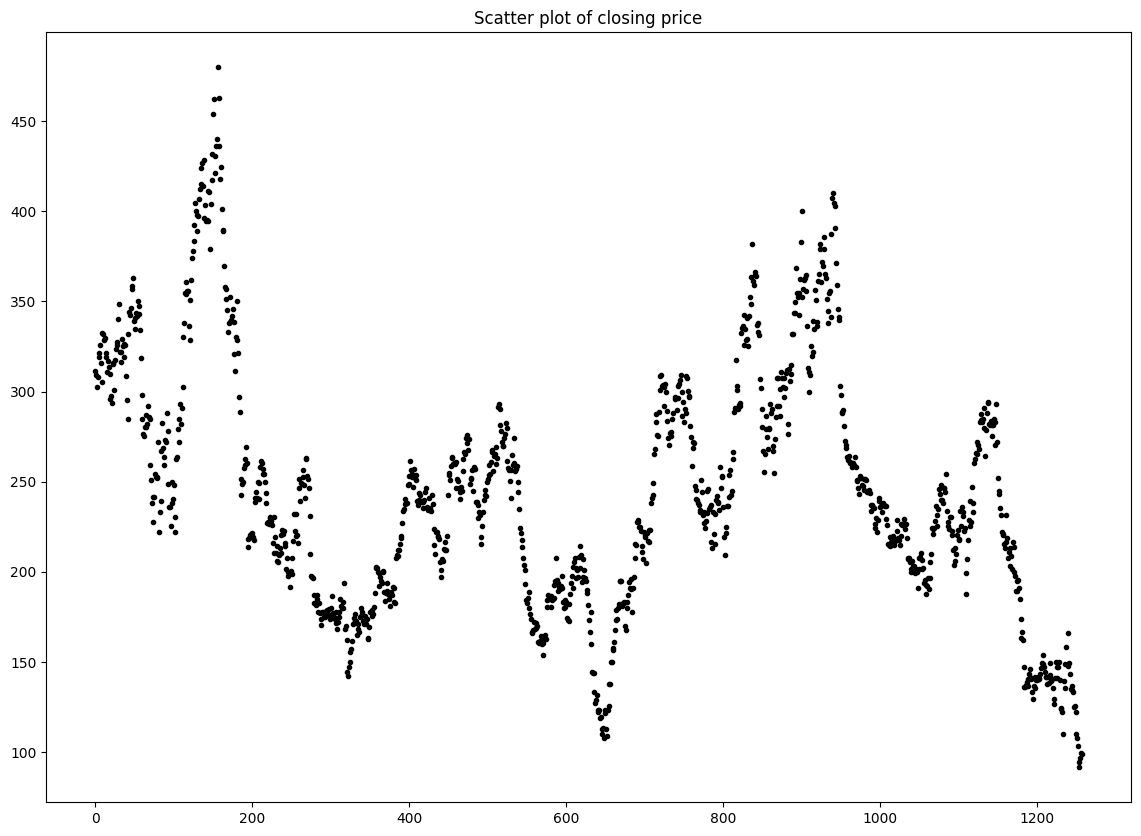

In [23]:
df_close = data['Close']
plt.figure(figsize=(14,10))
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

****Create new column for price difference****

In [24]:
data['price_diff']=data['Close'].shift(-1)-data['Close']
data['price_diff']

,price_diff
0,-2.13
1,-6.63
2,5.64
3,10.77
4,2.16
...,...
1253,2.94
1254,2.28
1255,2.46
1256,-0.31


****Create new column for daily return****

In [25]:
data['daily_return']=data['price_diff']/data['Close']
data['daily_return']

,daily_return
0,-0.006840
1,-0.021438
2,0.018637
3,0.034937
4,0.006770
...,...
1253,0.032086
1254,0.024109
1255,0.025400
1256,-0.003122


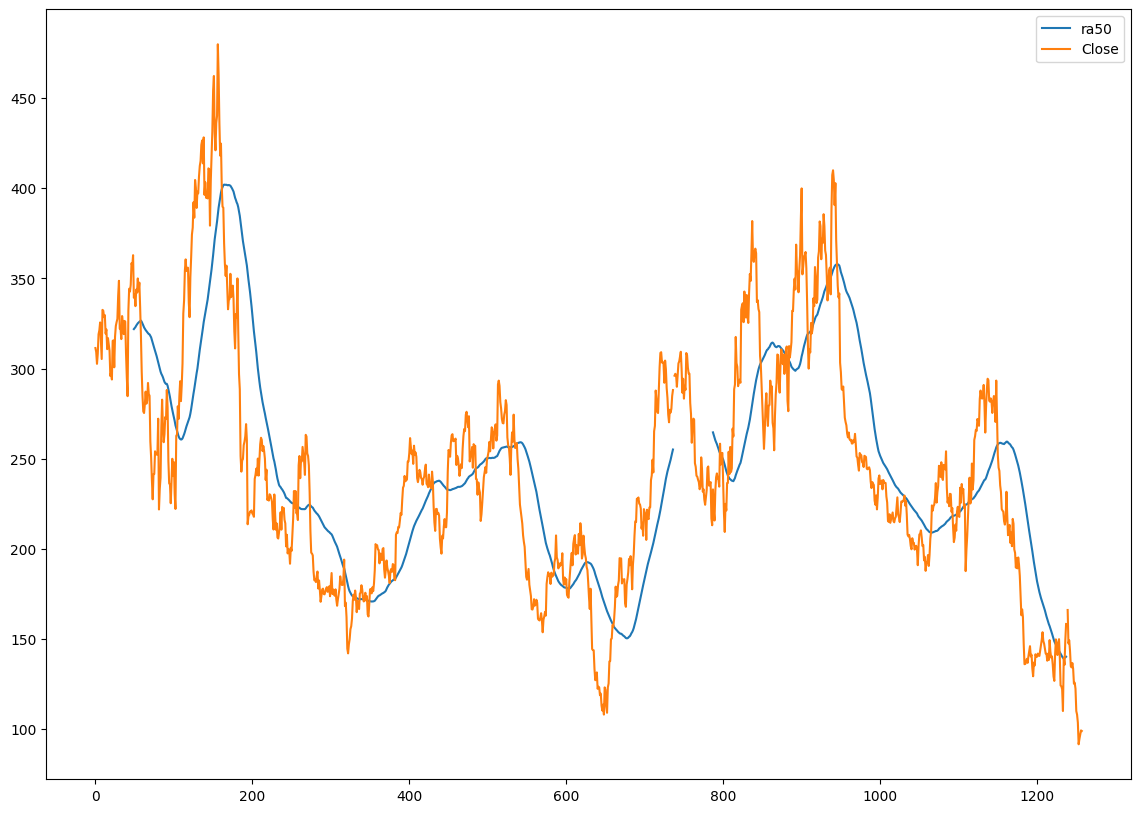

In [27]:
#here we apply rolling widow calculation for 50 days

'''In statistics, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series
 of averages of different subsets of the full data set. It is also called a moving mean (MM). or rolling mean and is a type of
finite impulse response filter. Variations include: simple, cumulative, or weighted forms (described below). Highly used for financial analyses.'''

data['ra50']=data['Close'].rolling(50).mean()
plt.figure(figsize=(14,10))
data['ra50'].plot()
data['Close'].plot()
plt.legend()
plt.show()

#here we have five year chrt of tesla stock with simple moveing average  the blue line is shorter 50 days moveing average most trader will use the cross of short term moveing averagae
#to initial a moveing average to inital a long position and identify  the start of bullish trend


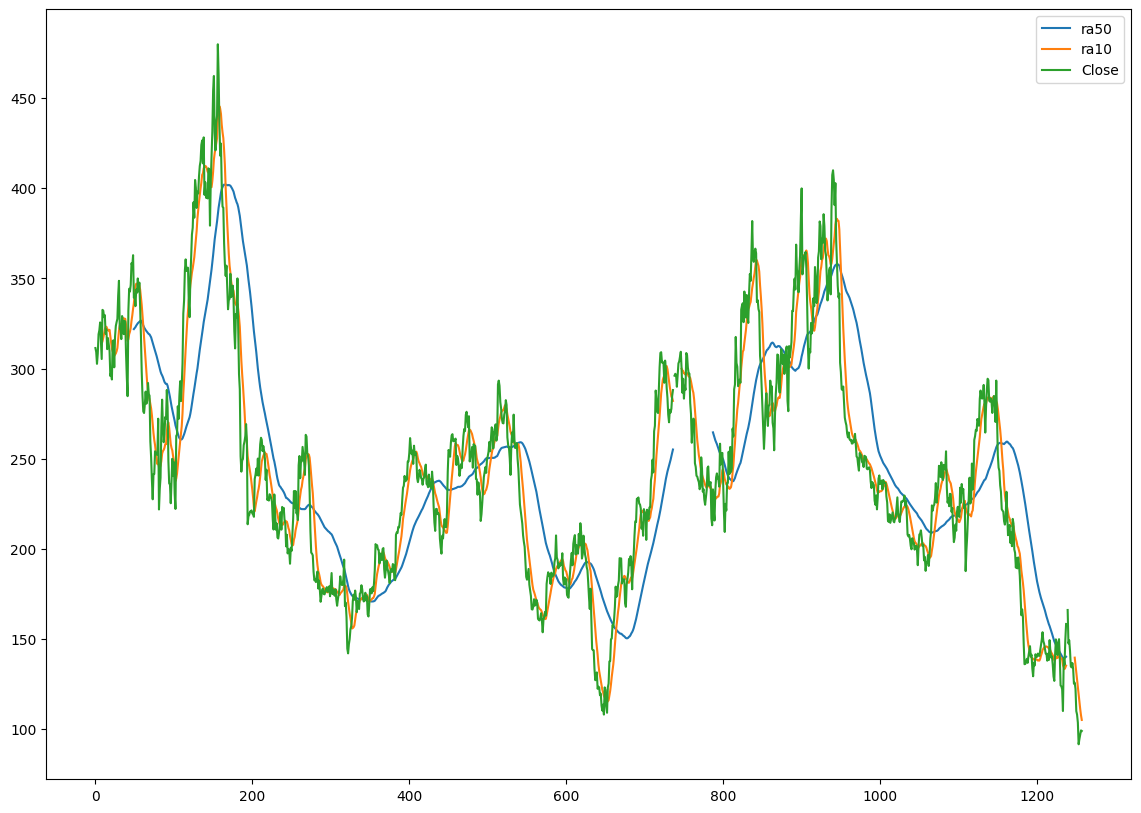

In [28]:
data['ra50']=data['Close'].rolling(50).mean()
data['ra10']=data['Close'].rolling(10).mean()
plt.figure(figsize=(14,10))
data['ra50'].plot()
data['ra10'].plot()
data['Close'].plot()
plt.legend()
plt.show()

In [29]:
data['ra50']=data['Close'].rolling(50).mean()
data['ra10']=data['Close'].rolling(10).mean()

In [30]:
data = data.dropna()
data

,Date,Open,High,Low,Close,Adj_Close,Volume,price_diff,daily_return,ra50,ra10
49,2025-05-23,337.92,343.18,333.21,339.34,339.34,"84,654,800",1.70,0.005010,321.8976,336.287
50,2025-05-22,331.90,347.27,331.39,341.04,341.04,"97,113,400",-6.42,-0.018825,322.4906,340.877
51,2025-05-21,344.43,347.35,332.20,334.62,334.62,"102,354,800",9.20,0.027494,322.9978,345.869
52,2025-05-20,347.87,354.99,341.63,343.82,343.82,"131,715,500",-1.73,-0.005032,323.8216,347.046
53,2025-05-19,336.30,343.00,333.37,342.09,342.09,"88,869,900",7.89,0.023064,324.4980,346.828
...,...,...,...,...,...,...,...,...,...,...,...
1232,2020-09-09,118.87,123.00,113.84,122.09,122.09,"238,397,400",-12.02,-0.098452,140.2410,138.688
1233,2020-09-08,118.67,122.91,109.96,110.07,110.07,"346,397,100",29.37,0.266830,139.4984,135.554
1234,2020-09-04,134.27,142.67,124.01,139.44,139.44,"330,965,700",-3.77,-0.027037,139.5666,134.518
1235,2020-09-03,135.74,143.93,134.00,135.67,135.67,"262,788,300",13.45,0.099138,139.5566,133.347


In [31]:
data['Shares']= [1 if data.loc[ei,'ra10']>data.loc[ei,'ra50'] else 0 for ei in data.index]

/tmp/ipython-input-2713343999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shares']= [1 if data.loc[ei,'ra10']>data.loc[ei,'ra50'] else 0 for ei in data.index]


/tmp/ipython-input-1973988197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close1']=data['Close'].shift(-1)
/tmp/ipython-input-1973988197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['profit']=[data.loc[ei,'Close1']-data.loc[ei,'Close'] if data.loc[ei,'Shares']==1 else 0 for ei in data.index]


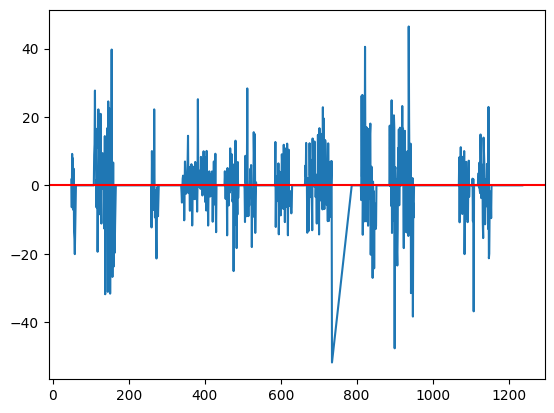

In [32]:
#Calculate Profit

data['Close1']=data['Close'].shift(-1)
data['profit']=[data.loc[ei,'Close1']-data.loc[ei,'Close'] if data.loc[ei,'Shares']==1 else 0 for ei in data.index]
data['profit'].plot()
plt.axhline(y=0,color='red')

In [36]:
data['log_return']=np.log(data['Close'].shift(-1)-np.log(data['Close']))
data['log_return']

/tmp/ipython-input-1255733934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_return']=np.log(data['Close'].shift(-1)-np.log(data['Close']))


,log_return
49,5.814766
50,5.795413
51,5.823067
52,5.817855
53,5.841063
...,...
1232,4.656483
1233,4.903339
1234,4.873152
1235,4.971269


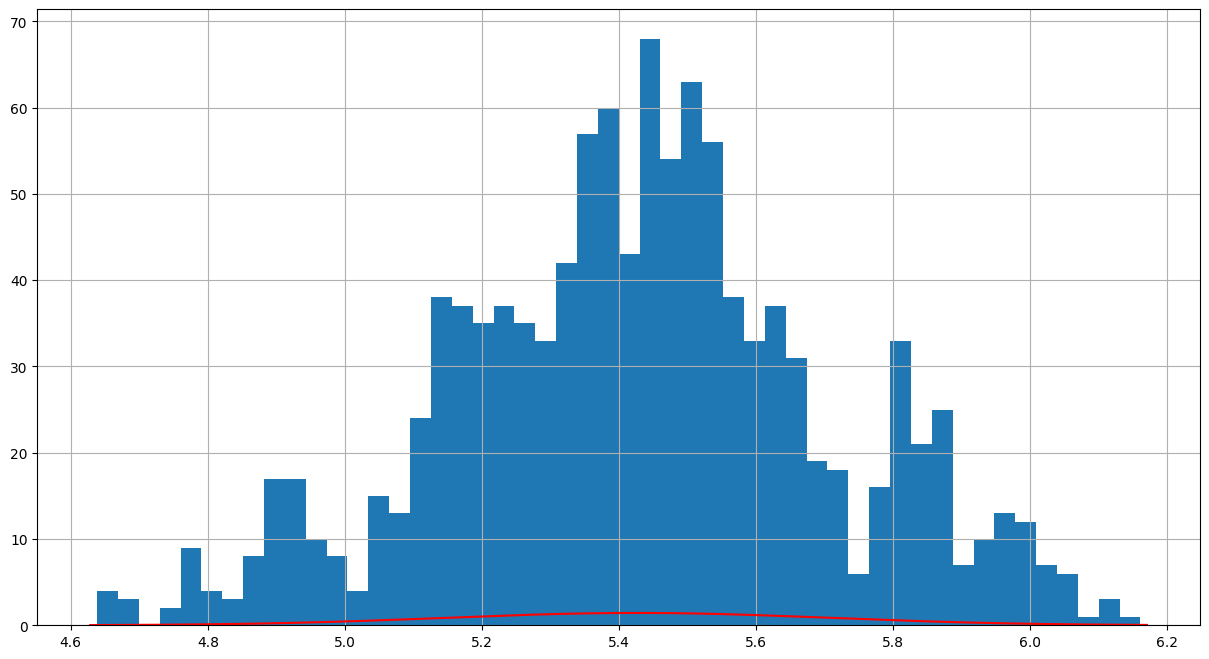

In [39]:
from scipy.stats import norm
mu = data['log_return'].mean()
sigma = data['log_return'].std(ddof=1)

density = pd.DataFrame()
density['x']=np.arange(data['log_return'].min()-0.01, data['log_return'].max()+0.01,0.001)
density['pdf'] = norm.pdf(density['x'],mu,sigma)

data['log_return'].hist(bins=50, figsize=(15,8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [40]:
prob_return1 = norm.cdf(-0.10,mu,sigma)
print('The probability of dropping over 10% in one day',prob_return1)

The probability of dropping over 10% in one day 9.979876747314174e-88


In [41]:
mu220 = 365*mu
sigma220 = (365**0.5)*sigma
drop20 = None
print('The probability of dropping over 25% over a year:',drop20)

The probability of dropping over 25% over a year: None


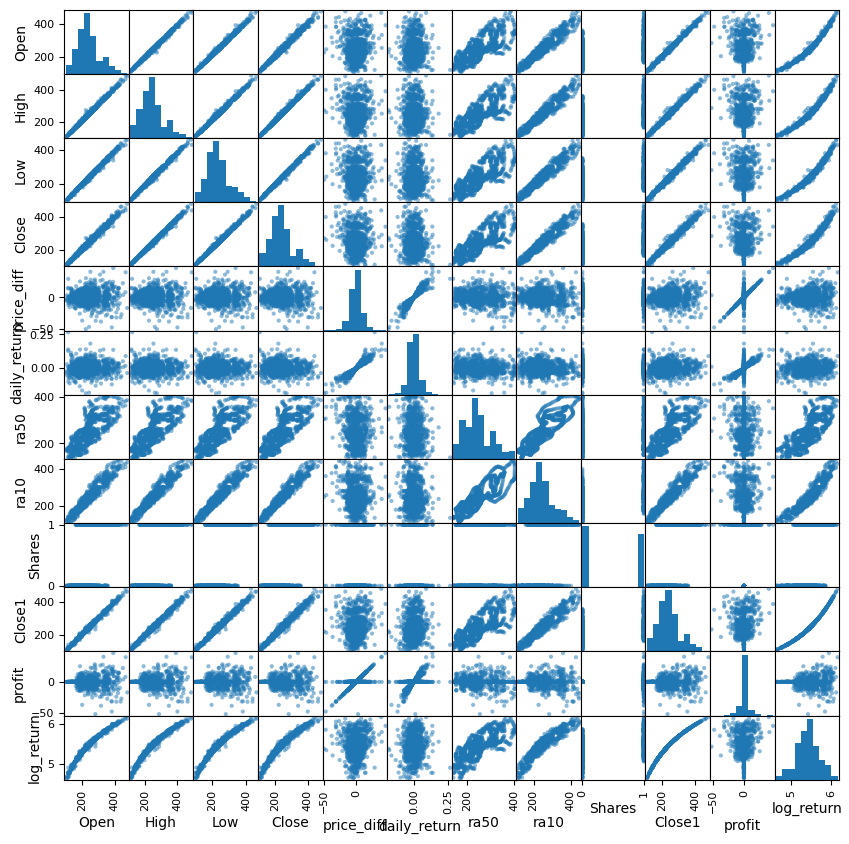

In [42]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(data, figsize=(10,10))

In [43]:
data.to_csv('tesla_final_stock.csv')